<a href="https://colab.research.google.com/github/Divya-d14/Upliance/blob/main/Upliance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory data analysis on Upliance cookery dataset**

In [1]:
#importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

## **Understanding the data**

In [2]:
# Reading specific sheets
# Download the Excel file directly using raw.githubusercontent.com ( the merged final dataset)

df = pd.read_excel("https://raw.githubusercontent.com/Divya-d14/Upliance/main/Upliancedataset.xlsx", sheet_name="OrderDetails.csv", engine='openpyxl')

In [3]:
df.columns

Index(['Order ID', 'User ID', 'User Name', 'Age', 'Location',
       'Registration Date', 'Phone', 'Email', 'Favorite Meal', 'Total Orders',
       'Order Date', 'Meal Type', 'Dish Name', 'Order Status', 'Amount (USD)',
       'Time of Day', 'Rating', 'Session ID', 'Session Start', 'Session End',
       'Duration (mins)', 'Session Rating'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           16 non-null     int64         
 1   User ID            16 non-null     object        
 2   User Name          16 non-null     object        
 3   Age                16 non-null     int64         
 4   Location           16 non-null     object        
 5   Registration Date  16 non-null     datetime64[ns]
 6   Phone              16 non-null     object        
 7   Email              16 non-null     object        
 8   Favorite Meal      16 non-null     object        
 9   Total Orders       16 non-null     int64         
 10  Order Date         16 non-null     datetime64[ns]
 11  Meal Type          16 non-null     object        
 12  Dish Name          16 non-null     object        
 13  Order Status       16 non-null     object        
 14  Amount (USD)

In [5]:
round(df.isna().sum()/len(df),2)*100

,0
Order ID,0.0
User ID,0.0
User Name,0.0
Age,0.0
Location,0.0
Registration Date,0.0
Phone,0.0
Email,0.0
Favorite Meal,0.0
Total Orders,0.0


In [6]:
df.duplicated().any()

False

## **Data Cleaning**

In [7]:
df[df['Order Status']=='Canceled']

,Order ID,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,...,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID,Session Start,Session End,Duration (mins),Session Rating
2,1003,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,...,Grilled Chicken,Canceled,12.5,Night,NaN,S003,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
7,1008,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,...,Veggie Burger,Canceled,11.0,Day,NaN,S008,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4


Two orders with Grilled Chicken and Veggie Burger are canceled by the same user

In [8]:
df=df[df['Order Status']!='Canceled']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 15
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           14 non-null     int64         
 1   User ID            14 non-null     object        
 2   User Name          14 non-null     object        
 3   Age                14 non-null     int64         
 4   Location           14 non-null     object        
 5   Registration Date  14 non-null     datetime64[ns]
 6   Phone              14 non-null     object        
 7   Email              14 non-null     object        
 8   Favorite Meal      14 non-null     object        
 9   Total Orders       14 non-null     int64         
 10  Order Date         14 non-null     datetime64[ns]
 11  Meal Type          14 non-null     object        
 12  Dish Name          14 non-null     object        
 13  Order Status       14 non-null     object        
 14  Amount (USD)     

In [9]:
df.describe(include="object").T

,count,unique,top,freq
User ID,14,8,U001,3
User Name,14,8,Alice Johnson,3
Location,14,8,New York,3
Phone,14,8,123-456-7890,3
Email,14,8,alice@email.com,3
Favorite Meal,14,3,Dinner,7
Meal Type,14,3,Dinner,7
Dish Name,14,6,Spaghetti,4
Order Status,14,1,Completed,14
Time of Day,14,3,Night,7


In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order ID,14.0,1008.928571,1001.0,1005.25,1009.5,1012.75,1016.0,4.859001
Age,14.0,31.357143,25.0,28.0,30.0,35.0,42.0,4.908503
Registration Date,14,2023-04-03 18:51:25.714285824,2023-01-15 00:00:00,2023-02-20 00:00:00,2023-03-23 00:00:00,2023-05-22 00:00:00,2023-08-11 00:00:00,NaN
Total Orders,14.0,9.928571,5.0,8.0,9.5,12.0,15.0,2.786348
Order Date,14,2024-12-04 17:08:34.285714176,2024-12-01 00:00:00,2024-12-03 00:00:00,2024-12-05 00:00:00,2024-12-06 18:00:00,2024-12-08 00:00:00,NaN
Amount (USD),14.0,11.178571,7.0,9.0,11.5,13.375,15.0,2.591459
Rating,14.0,4.285714,4.0,4.0,4.0,4.75,5.0,0.468807
Session Start,14,2024-12-05 07:45:00,2024-12-01 12:00:00,2024-12-03 14:22:30,2024-12-05 13:00:00,2024-12-07 08:07:30,2024-12-08 19:30:00,NaN
Session End,14,2024-12-05 08:15:21.428571392,2024-12-01 12:20:00,2024-12-03 14:41:15,2024-12-05 13:25:00,2024-12-07 08:40:00,2024-12-08 20:10:00,NaN
Duration (mins),14.0,30.357143,10.0,22.5,30.0,40.0,45.0,11.000749


In [11]:
df['Order ID']=df['Order ID'].astype('object')

In [12]:
df.sample(10)

,Order ID,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,...,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID,Session Start,Session End,Duration (mins),Session Rating
0,1001,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,...,Spaghetti,Completed,15.0,Night,5.0,S001,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
3,1004,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,...,Pancakes,Completed,8.0,Morning,4.0,S004,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
10,1011,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,...,Pancakes,Completed,8.5,Morning,4.0,S011,2024-12-06 08:00:00,2024-12-06 08:30:00,30,4.6
15,1016,U008,Henry Lee,31,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5,...,Veggie Burger,Completed,11.0,Day,4.0,S016,2024-12-08 13:30:00,2024-12-08 13:50:00,20,4.3
9,1010,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,...,Oatmeal,Completed,7.0,Morning,4.0,S010,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1
14,1015,U007,Grace King,38,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14,...,Spaghetti,Completed,14.0,Night,5.0,S015,2024-12-08 19:30:00,2024-12-08 20:10:00,40,5.0
11,1012,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10,...,Spaghetti,Completed,12.5,Night,4.0,S012,2024-12-06 19:00:00,2024-12-06 19:40:00,40,4.7
6,1007,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9,...,Grilled Chicken,Completed,13.5,Night,4.0,S007,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6
12,1013,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9,...,Caesar Salad,Completed,9.0,Day,4.0,S013,2024-12-07 12:30:00,2024-12-07 13:00:00,30,4.4
13,1014,U006,Frank Green,25,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7,...,Grilled Chicken,Completed,13.0,Night,5.0,S014,2024-12-07 18:00:00,2024-12-07 18:45:00,45,4.8


## **Data Visualization**

In [13]:
sns.color_palette("pastel")
sns.set_style("whitegrid")

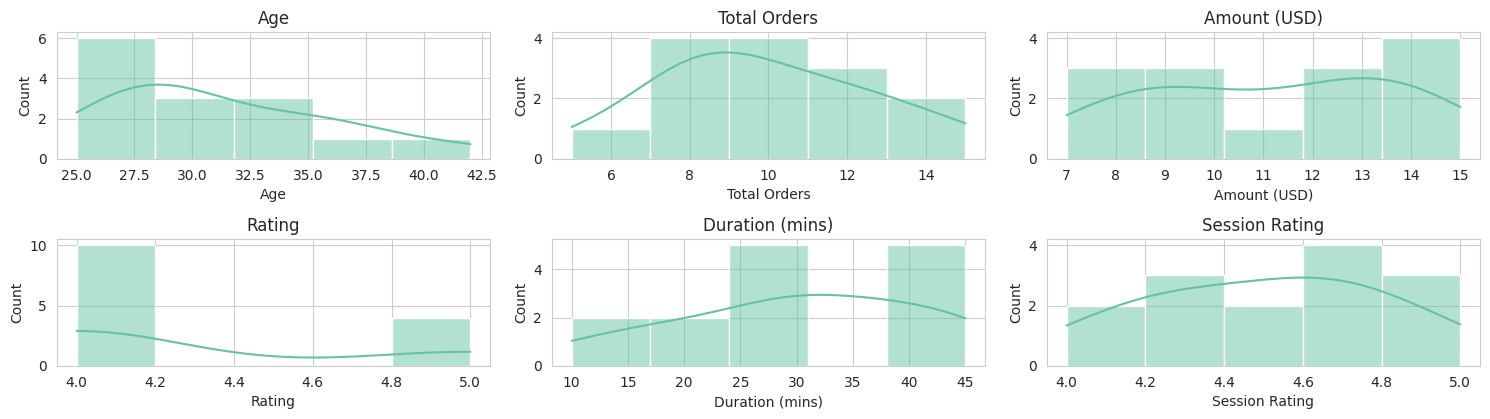

In [14]:
num_col = df.select_dtypes(include=['number'])
sns.set_palette("Set2")
plt.figure(figsize=(15,8))
for i,col in enumerate(num_col):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()

- The majority of orders were placed by individuals aged 25–27, with the minimum recorded age being 25 and the maximum 42.  
- More number of orders per person ranged between 8 and 10, with a maximum of 14 orders and a minimum of 6.  
- The order amounts varied, with the highest being \$15 and the lowest \$7  
- Session durations ranged from a minimum of 10 minutes to a maximum of 45 minutes.  

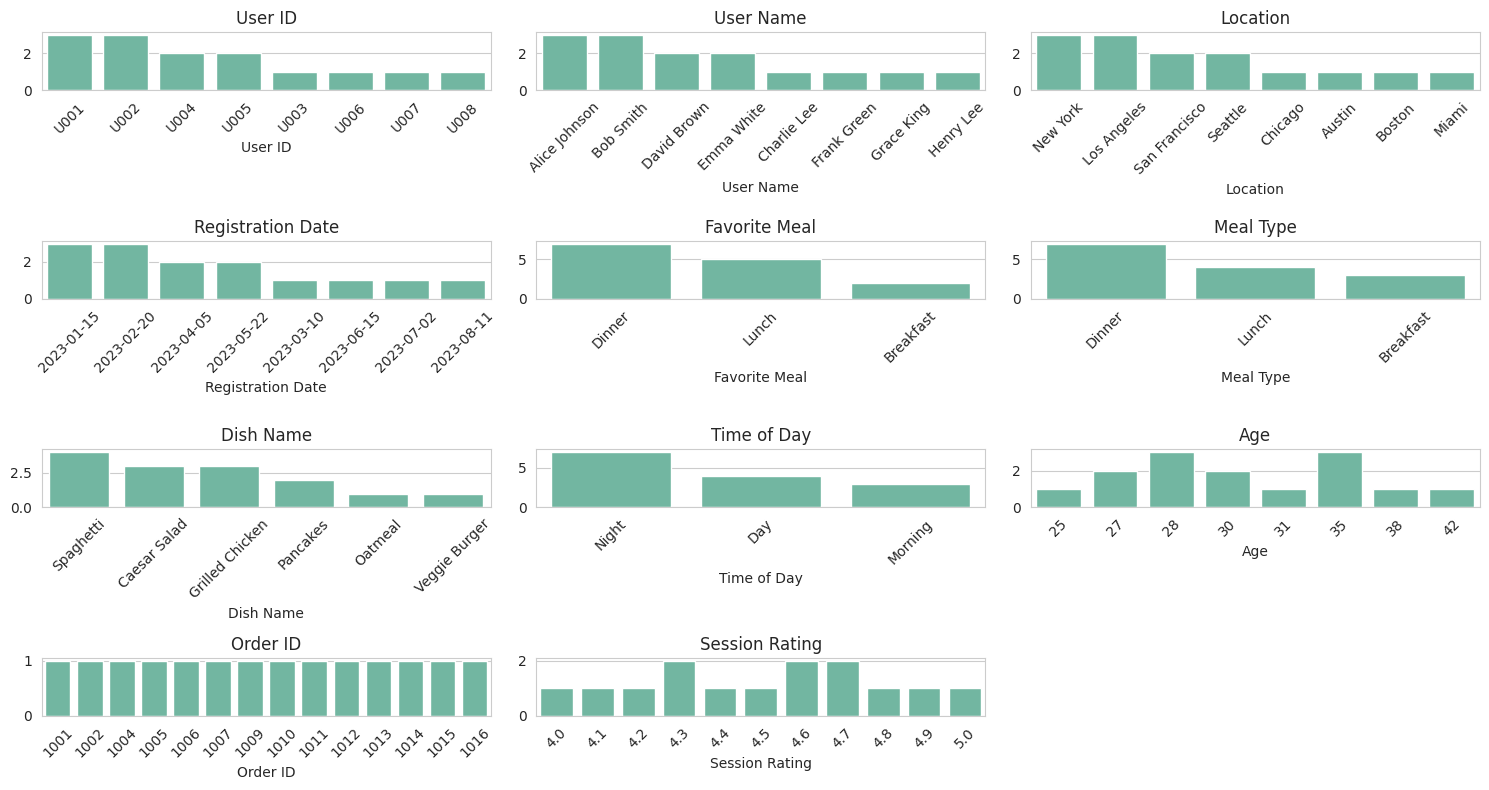

In [15]:
cat_col = ['User ID', 'User Name', 'Location', 'Registration Date', 'Favorite Meal', 'Meal Type', 'Dish Name', 'Time of Day', 'Age', 'Order ID','Session Rating']
# Adjust the subplot grid to accommodate all columns
# Calculate the number of rows needed based on the number of columns
num_rows = int(np.ceil(len(cat_col) / 3))  # Assuming 3 columns per row
plt.figure(figsize=(15, 8))

for i, col in enumerate(cat_col):
    # Use num_rows instead of a fixed value (4)
    plt.subplot(num_rows, 3, i + 1)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.xticks(rotation=45)
    plt.title(col)

plt.tight_layout()
plt.show()

- The majority of orders were placed during nighttime, which also emerged as the favorite time for meals

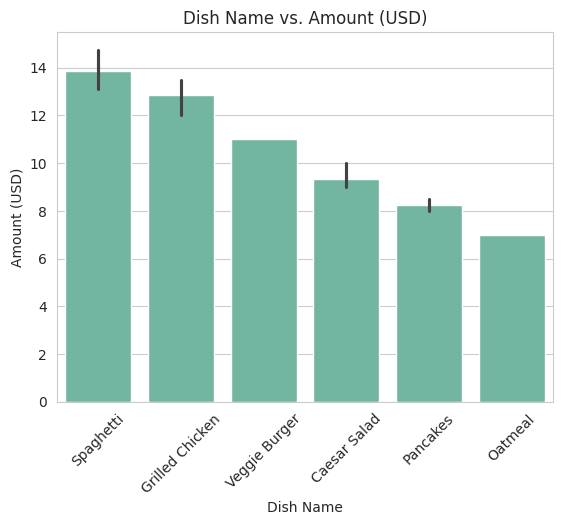

In [16]:
# Sort the DataFrame by 'Amount (USD)' in descending order
df_sorted = df.sort_values(by="Amount (USD)", ascending=False)

# Set the style
sns.set_style("whitegrid")

# Create the bar plot
sns.barplot(x=df_sorted['Dish Name'], y=df_sorted['Amount (USD)'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title("Dish Name vs. Amount (USD)")
plt.xlabel("Dish Name")
plt.ylabel("Amount (USD)")

# Display the plot
plt.show()


Spaghetti generates the highest revenue, followed by grilled chicken, while oatmeal contributes the least.<br>
or<br>
Spaghetti is the costliest, followed by grilled chicken. Oatmeal is the least expensive

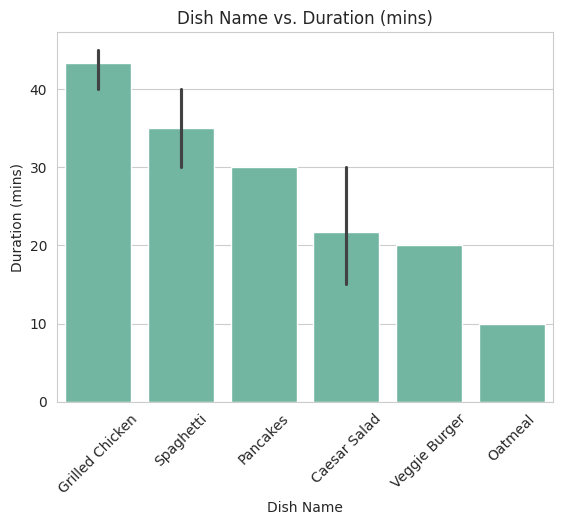

In [17]:
# Sort the DataFrame by 'Duration (mins)' in descending order
df_sorted = df.sort_values(by="Duration (mins)", ascending=False)

# Set the style
sns.set_style("whitegrid")

# Create the bar plot
sns.barplot(x=df_sorted['Dish Name'], y=df_sorted['Duration (mins)'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.title("Dish Name vs. Duration (mins)")
plt.xlabel("Dish Name")
plt.ylabel("Duration (mins)")

# Display the plot
plt.show()

Grilled chicken takes the longest time to prepare, followed by spaghetti, while oatmeal requires the least preparation time.

In [18]:
# orders over years , months
df['Year']=df['Registration Date'].dt.year
df['Month']=df['Registration Date'].dt.month
display(df.groupby('Year')['Order ID'].count())
display(df.groupby('Month')['Order ID'].count())
df.drop(['Year','Month'],axis=1,inplace=True)

,Order ID
Year,
2023,14


,Order ID
Month,
1,3
2,3
3,1
4,2
5,2
6,1
7,1
8,1


All the registered users are from a single year, 2023. The data suggests a higher volume of registrations in the initial months, followed by a gradual decline in subsequent months. However, a larger dataset would provide more clarity and allow for a more accurate assessment of this trend.

In [19]:
# orders over years , months
df['Year']=df['Session Start'].dt.year
df['Month']=df['Session Start'].dt.month
display(df.groupby('Year')['Order ID'].count())
display(df.groupby('Month')['Order ID'].count())
df.drop(['Year','Month'],axis=1,inplace=True)

,Order ID
Year,
2024,14


,Order ID
Month,
12,14


All the Sessions are from December 2024

<Axes: >

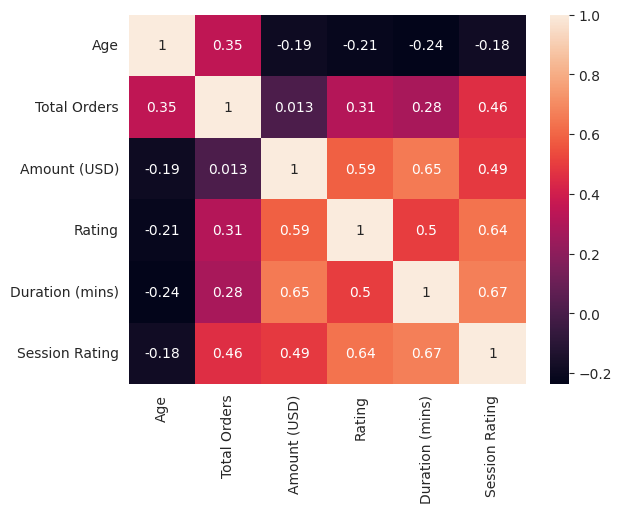

In [20]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

- Rating and Amount (USD) have a strong positive correlation of 0.59, indicating that higher spending is associated with better ratings.
- Rating and Session Rating are strongly positively correlated at 0.64, suggesting that better ratings correspond with higher session ratings.
- Duration (mins) and Amount (USD) show a high correlation of 0.65, meaning longer sessions tend to result in higher spending.
- Duration (mins) and Session Rating have a strong positive correlation of 0.67, indicating that longer sessions lead to better session ratings.
- Total Orders and Session Rating have a moderate positive correlation of 0.46, implying that more orders are linked to better session ratings.
- Total Orders and Rating are moderately positively correlated at 0.31, meaning that customers giving higher ratings are likely to place more orders.
- Total Orders and Duration (mins) have a moderate correlation of 0.31, suggesting that customers who place more orders tend to have longer sessions.
- Age and Amount (USD) have a weak negative correlation of -0.19, indicating that older customers might spend less, though the correlation is weak.
- Age and Rating have a weak negative correlation of -0.21, suggesting that older customers tend to rate their experience lower.
- Age and Session Rating have a slight negative correlation of -0.18, indicating that older customers might give slightly lower session ratings.
- Amount (USD) and Session Rating show a moderate positive correlation of 0.49, suggesting that higher spending is linked to better session ratings.

<Axes: xlabel='Dish Name'>

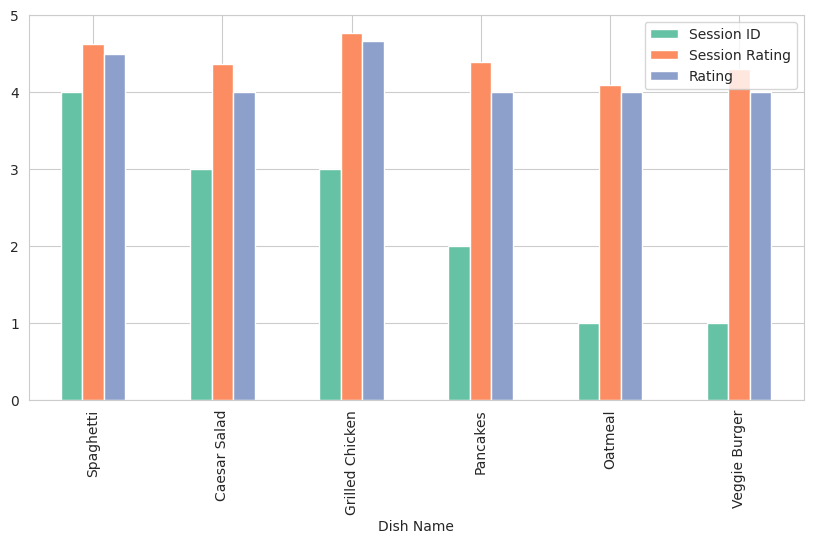

In [21]:
df.groupby('Dish Name')[['Session ID','Session Rating','Rating']].agg({'Session ID':'count','Session Rating': 'mean','Rating':'mean'}).sort_values(by='Session ID',ascending=False).plot(kind='bar',figsize=(10,5))

- Spaghetti has the highest number of sessions, followed by Caesar Salad and Grilled Chicken.
- Grilled Chicken and Spaghetti received good ratings and Session Ratings.
- Oatmeal and Veggie Burger each had only one session.

In [22]:
pd.crosstab(df['Dish Name'],df['Meal Type'])

Meal Type,Breakfast,Dinner,Lunch
Dish Name,,,
Caesar Salad,0,0,3
Grilled Chicken,0,3,0
Oatmeal,1,0,0
Pancakes,2,0,0
Spaghetti,0,4,0
Veggie Burger,0,0,1


- **Breakfast Orders / Preferable Breakfast Items**: Oatmeal, Pancakes
- **Lunch Orders / Preferable Lunch Items**: Caesar Salad, Veggie Burger
- **Dinner Orders / Preferable Dinner Items**: Grilled Chicken, Spaghetti


In [23]:
pd.crosstab(df['Dish Name'],df['Favorite Meal'])

Favorite Meal,Breakfast,Dinner,Lunch
Dish Name,,,
Caesar Salad,0,1,2
Grilled Chicken,0,2,1
Oatmeal,0,0,1
Pancakes,1,1,0
Spaghetti,1,2,1
Veggie Burger,0,1,0


The more likely a customer favors a particular meal type, the more likely they are to order the respective dishes associated with that time of day.


## **Final Insights and Recommendations**

### **Final Insights:**

1. **Demographics and Spending Behavior**:
   - The majority of orders come from individuals aged **25–27**, indicating this age group is most engaged and potentially the core target market.
   - Customers within this age range also tend to place **8–10 orders** on average, with **14 orders** being the maximum. This suggests a trend of repeat customers, with loyalty playing a key role in driving order frequency.
   - There is a **weak negative correlation** between **Age** and **Amount (USD)**, indicating that older customers may spend slightly less, though the effect is not significant.

2. **Order Timing and Popularity**:
   - **Nighttime** is the peak time for meal orders, making it the preferred time for customers. Targeting promotions or specials during this time could help increase order volume.
   - Meal preferences are closely tied to the time of day:
     - **Breakfast** orders are most often **Oatmeal** and **Pancakes**.
     - **Lunch** orders tend to be **Caesar Salad** and **Veggie Burger**.
     - **Dinner** is dominated by **Grilled Chicken** and **Spaghetti**.
   - Customers are more likely to order dishes that align with their preferred time of day, reinforcing the importance of time-based marketing.

3. **Revenue and Cost Analysis**:
   - **Spaghetti** generates the highest revenue and is the costliest dish, followed by **Grilled Chicken**, while **Oatmeal** contributes the least in both price and revenue.
   - **Spaghetti** and **Grilled Chicken** also tend to have higher session ratings and customer satisfaction, indicating that these dishes are well-liked and could be marketed as premium options.

4. **Session Duration and Spending Behavior**:
   - Longer session durations (**Duration (mins)**) are positively correlated with **higher spending** (**Amount (USD)**), with a correlation of **0.65**. This suggests that customers who spend more time per session tend to make larger purchases.
   - There is also a positive correlation between **Duration (mins)** and **Session Rating** (**0.67**), indicating that longer sessions are generally perceived more positively.
   - To maximize revenue, encouraging customers to engage longer during their sessions could be beneficial, such as by offering more personalized or interactive options.

5. **Ratings and Customer Satisfaction**:
   - There is a strong positive correlation (**0.64**) between **Rating** and **Session Rating**, indicating that customers who provide higher ratings for their experience tend to also rate their sessions highly.
   - **Amount (USD)** and **Session Rating** show a moderate positive correlation (**0.49**), reinforcing the idea that higher spenders are more satisfied with their sessions. This indicates that increasing customer spend could also improve satisfaction.

6. **Dish Performance**:
   - **Spaghetti** has the highest number of sessions, followed by **Caesar Salad** and **Grilled Chicken**. These dishes are also associated with good **ratings** and **session ratings**, making them strong candidates for promotional focus.
   - **Oatmeal** and **Veggie Burger** had limited engagement, with only one session each, suggesting these dishes either need more attention or could be replaced with higher-demand alternatives.

### **Recommendations:**

1. **Target the 25-27 Age Group**:
   - Given their high order frequency and engagement, this age group should be the focal point for targeted marketing campaigns and personalized promotions.
   
2. **Focus on Nighttime Orders**:
   - Since nighttime is the most popular time for orders, consider offering special nighttime promotions or discounts to further boost sales during this peak time.

3. **Promote Popular Dishes**:
   - Focus on **Spaghetti** and **Grilled Chicken** in marketing and promotional efforts. These dishes not only generate the most revenue but also have the highest customer satisfaction.
   
4. **Encourage Longer Sessions**:
   - Use strategies to increase session durations, such as offering upsells, recommendations, or more engaging content during sessions. This could increase spending and customer satisfaction.
   
5. **Improve Engagement with Less Popular Dishes**:
   - **Oatmeal** and **Veggie Burger** show limited demand, so consider improving their appeal through promotional offers, better presentation, or replacing them with more popular dishes.

6. **Leverage Ratings for Insights**:
   - Take advantage of the strong correlation between **spending** and **ratings** by offering incentives for higher spenders, such as loyalty programs or exclusive offers, to further improve session ratings and repeat business.

7. **Optimize for Time of Day**:
   - Align meal offerings with customer preferences for specific times of day. Consider time-specific menu items or promotions to drive more orders at breakfast, lunch, and dinner times.
